# Comparación por nacionalidad de la altura de los jugadores de FIFA 22
## Sergi Joan Sastre Antequera
A partir de los datos de futbolistas de más de 30 ligas sacados del videojuego FIFA 22, se va a estudiar la media de altura de los futbolistas agrupados por diferentes países. Además de España, se va a analizar los datos de dos países con un promedio de altura alto (Dinamarca y Países Bajos) y dos países con un promedio bajo (La India y México).

## Preparación
Primero se importan las librerías.

In [1]:
from google.colab import drive # Para usar Google Drive
import os # Sistema operativo
import pandas as pd # Datasets
import numpy as np # Vectores, matrices
import matplotlib.pyplot as plt # Hacer gráficos
import scipy.stats as stats # Estadística
import seaborn as sns # Gráficos
from pandas.api.types import CategoricalDtype # Para variables ordinales

Se vincula la cuenta de Google Drive con el archivo a tratar.

In [2]:
drive.mount('mydrive')

Mounted at mydrive


Ahora se carga el archivo en un dataframe de pandas, del que leemos solo las columnas de interés para aligerar los procesos.

In [3]:
path = r'/content/mydrive/Othercomputers/portatil/Master/AnalisisDatos/Tarea2/players_fifa22.csv'
colum_leer = ['Nationality', 'Height']
df = pd.read_csv(path, usecols = colum_leer)
df

,Height,Nationality
0,170,Argentina
1,185,Poland
2,187,Portugal
3,182,France
4,188,Slovenia
...,...,...
19255,180,Republic of Ireland
19256,196,China PR
19257,183,China PR
19258,174,China PR


## Preparación datos

Cambiamos el nombre de la columna 'Height'.

In [4]:
df.rename(columns={'Height': 'Altura'}, inplace=True)

Añadimos una columna llamada Nacionalidad con las nacionalidades.

In [5]:
df.loc[df['Nationality'] == 'Netherlands', 'Nacionalidad'] = 'Países bajos'
df.loc[df['Nationality'] == 'Denmark', 'Nacionalidad'] = 'Dinamarca'
df.loc[df['Nationality'] == 'Spain', 'Nacionalidad'] = 'España'
df.loc[df['Nationality'] == 'Mexico', 'Nacionalidad'] = 'México'
df.loc[df['Nationality'] == 'India', 'Nacionalidad'] = 'India'

Vemos que se ha hecho bien.

In [6]:
pd.crosstab(df.Nationality, df.Nacionalidad)

Nacionalidad,Dinamarca,España,India,México,Países bajos
Nationality,,,,,
Denmark,306,0,0,0,0
India,0,0,213,0,0
Mexico,0,0,0,355,0
Netherlands,0,0,0,0,439
Spain,0,1091,0,0,0


Eliminamos los jugadores que no son de estas nacionalidades.

In [7]:
df.dropna(subset = ['Nacionalidad'], inplace = True)

Se va a crear un tipo de dato ordinal a partir de las nacionalidades. Se define el orden de los elementos y se crea una nueva columna con el nuevo tipo de dato.

In [9]:
categorias_Nacionalidad = ['Países bajos', 'Dinamarca', 'España', 'México', 'India']
tipo_Nacionalidad = CategoricalDtype(categories = categorias_Nacionalidad, ordered = True)
df['Nacionalidad_ord'] = df.Nacionalidad.astype(tipo_Nacionalidad)
df

,Altura,Nationality,Nacionalidad,Nacionalidad_ord
16,193,Netherlands,Países bajos,Países bajos
23,184,Spain,España,España
41,180,Netherlands,Países bajos,Países bajos
52,182,Spain,España,España
53,189,Spain,España,España
...,...,...,...,...
19231,169,India,India,India
19234,173,India,India,India
19240,176,India,India,India
19243,175,India,India,India


# Análisis de los datos

Ahora se dibuja un gráfico con el porcentaje de juagadores de cada nacionalidad de entre las 5 elegidas.

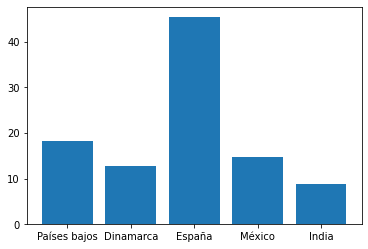

In [10]:
n_paises = pd.crosstab(index = df["Nacionalidad_ord"], columns="count")
n=n_paises.sum()[0]
n_paises_100 = (n_paises / n)*100
plt.bar(n_paises_100.index, n_paises_100['count'])
plt.show()

Entre estos dato destaca que cerca de la mitad de los datos son de España, Lo que significa que tiene muchos más jugadores en el juego que los otros países.

Agrupamos los datos de altura por la nacionalidad.

In [11]:
Altura_pai = df.loc[df.Nacionalidad_ord == 'Países bajos', 'Altura']
Altura_din = df.loc[df.Nacionalidad_ord == 'Dinamarca', 'Altura']
Altura_esp = df.loc[df.Nacionalidad_ord == 'España', 'Altura']
Altura_mex = df.loc[df.Nacionalidad_ord == 'México', 'Altura']
Altura_ind = df.loc[df.Nacionalidad_ord == 'India', 'Altura']

Hacemos un test anova en las medias de altura de los países del que obtenemos t y el p value.

In [12]:
t, p = stats.f_oneway(Altura_pai, Altura_din, Altura_esp, Altura_mex, Altura_ind)
p

5.750857879067777e-79

El pvalue siendo menos que 0.05 nos hace rechazar la hipotesis nula de que todas las medias son iguales con una seguridad del 95%. Hay por tanto diferencia de medias entre al menos alguna de las parejas de países.

Vemos la altura de por país.

In [13]:
df.groupby('Nacionalidad_ord').Altura.mean()

Nacionalidad_ord
Países bajos    183.469248
Dinamarca       184.490196
España          180.472044
México          177.763380
India           175.600939
Name: Altura, dtype: float64

Dibujamos las medias junto a sus intervalos de confianza del 95%.

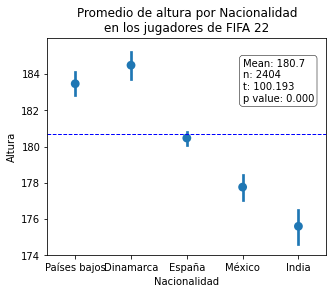

In [14]:
# Creación gráfico
plt.figure(figsize=(5,4))
ax = sns.pointplot(x="Nacionalidad_ord", y="Altura", data=df,ci=95, join=0)

# Eje Y
plt.yticks(np.arange(174, 186, step=2))
plt.ylim(174, 186)

# Línea horizontal con la media total de los 5 países
plt.axhline(y=df.Altura.mean(), linewidth=1, linestyle= 'dashed', color="blue")

# Cuadro con la media, el tamaño de la muestra, y el t y p value
media = str(df.Altura.mean().__round__(1))
n = str(n)
t = format(t, '.3f')
p = format(p, '.3f')
texto_caja = 'Mean: ' + media + '\nn: ' + n + '\nt: ' + t + '\np value: ' + p
props = dict(boxstyle = 'round', facecolor= 'white', lw=0.5)
plt.text(3, 182.5, texto_caja, bbox=props)

# Nombre de ejes y gráfico
plt.xlabel('Nacionalidad')
plt.title('Promedio de altura por Nacionalidad\nen los jugadores de FIFA 22')

plt.show()

Del gráfico podemos ver que de las 5 nacionalidades, la media de La India, México y España son diferentes cada una respecto a todas las demás. Esto puede ser asegurado con una confianza del 95%. Sin embargo, en el caso de Países Bajos y Dinamarca no tenemos la misma seguridad para afirmar la diferencia entre sus medias de altura.